# Ploting the time series data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'

In [ ]:
df = pd.read_csv(url,parse_dates=['Month'],index_col='Month')

In [ ]:
df.columns = ['Passengers']

In [ ]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


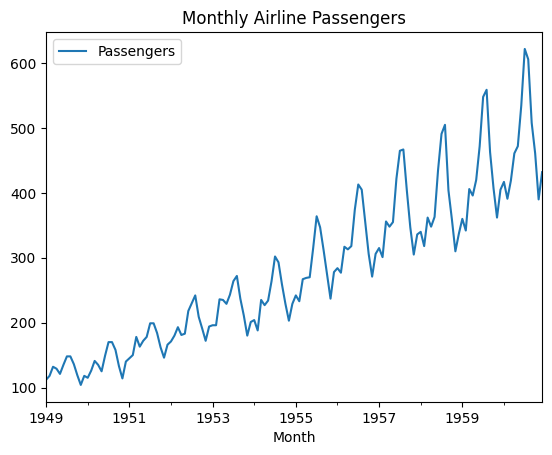

In [ ]:
df.plot(title='Monthly Airline Passengers')
plt.show()

# Checking Stationarity

In [ ]:
rolmean = df['Passengers'].rolling(window=12).mean()
rolstd = df['Passengers'].rolling(window=12).std()

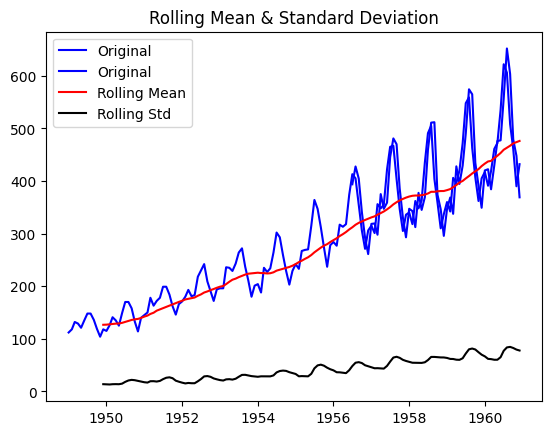

<Figure size 1000x800 with 0 Axes>

In [56]:
plt.plot(df, color='blue', label='Original')
plt.plot(rolmean, color='red', label='Rolling Mean')
plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc="best")
plt.title('Rolling Mean & Standard Deviation')
plt.figure(figsize=(10, 8))
plt.show()

# Converting Non-Stationary Data to Stationary

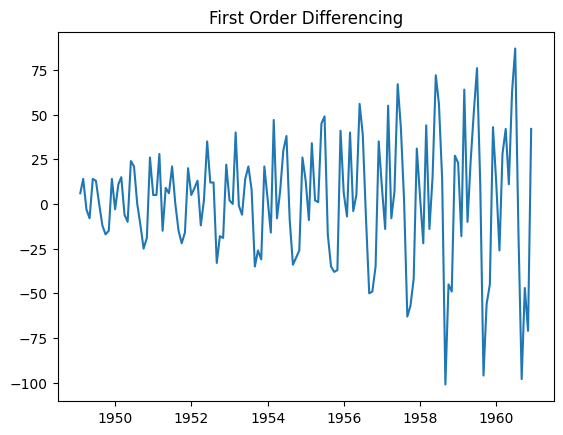

<Figure size 1200x800 with 0 Axes>

In [55]:
df_diff = df['Passengers'].diff().dropna()
plt.plot(df_diff)
plt.title('First Order Differencing')
plt.figure(figsize=(12, 8))
plt.show()

# Implementing Dickey Fuller Test

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
result = adfuller(df_diff)

In [ ]:
print(f'ADF Statistics:{result[0]}')

ADF Statistics:-2.8292668241700047


In [ ]:
print('p-value:{result[1]}')

p-value:{result[1]}


In [ ]:
for key,value in result[4].items():
    print(f'{key}:{value}')

1%:-3.4816817173418295
5%:-2.8840418343195267
10%:-2.578770059171598


# Plot ACF and PACF

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

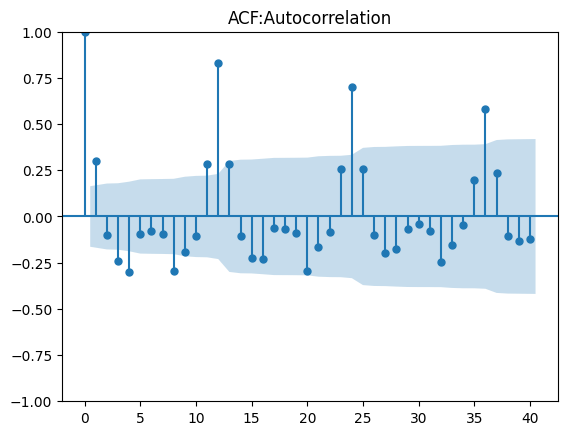

In [ ]:
plot_acf(df_diff,lags=40)
plt.title('ACF:Autocorrelation')
plt.show()

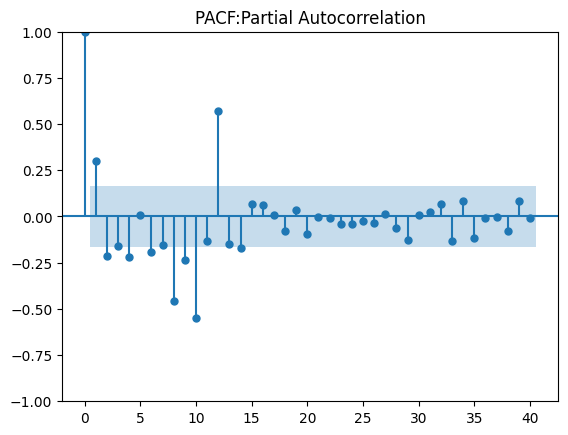

In [ ]:
plot_pacf(df_diff,lags=40)
plt.title('PACF:Partial Autocorrelation')
plt.show()

# Genereating The ARIMA plot

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
model = ARIMA(df['Passengers'],order=(1,2,1))

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
model_fit = model.fit()

In [ ]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -696.464
Date:                Tue, 17 Jun 2025   AIC                           1398.928
Time:                        18:43:50   BIC                           1407.796
Sample:                    01-01-1949   HQIC                          1402.532
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3130      0.100      3.127      0.002       0.117       0.509
ma.L1         -0.9998      5.946     -0.168      0.866     -12.655      10.655
sigma2      1034.0044   6187.776      0.167      0.8

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


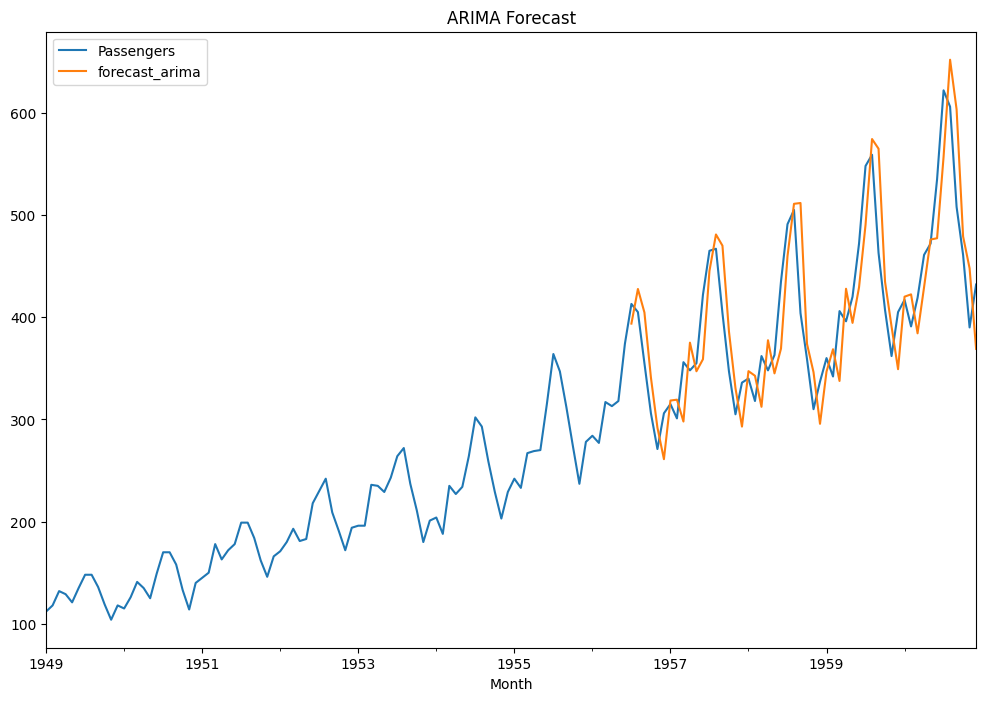

In [ ]:
df['forecast_arima'] = model_fit.predict(start=90,end=len(df),typ='levels')
df[['Passengers','forecast_arima']].plot(figsize=(12,8))
plt.title('ARIMA Forecast')
plt.show()

# TSA Forecasting

In [ ]:
forecast = model_fit.forecast(steps=len(df)//4)

In [ ]:
print(forecast)

1961-01-01    446.777024
1961-02-01    453.034430
1961-03-01    456.625562
1961-04-01    459.382266
1961-05-01    461.877830
1961-06-01    464.291668
1961-07-01    466.679929
1961-08-01    469.060187
1961-09-01    471.437939
1961-10-01    473.814907
1961-11-01    476.191630
1961-12-01    478.568276
1962-01-01    480.944898
1962-02-01    483.321512
1962-03-01    485.698124
1962-04-01    488.074735
1962-05-01    490.451346
1962-06-01    492.827958
1962-07-01    495.204569
1962-08-01    497.581180
1962-09-01    499.957791
1962-10-01    502.334402
1962-11-01    504.711013
1962-12-01    507.087624
1963-01-01    509.464235
1963-02-01    511.840846
1963-03-01    514.217457
1963-04-01    516.594068
1963-05-01    518.970679
1963-06-01    521.347290
1963-07-01    523.723901
1963-08-01    526.100512
1963-09-01    528.477123
1963-10-01    530.853734
1963-11-01    533.230345
1963-12-01    535.606956
Freq: MS, Name: predicted_mean, dtype: float64


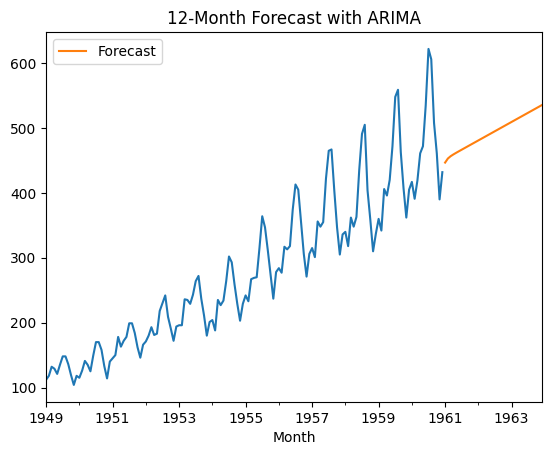

In [ ]:
df['Passengers'].plot(label='Historical')
forecast.plot(label='Forecast', legend=True)
plt.title("12-Month Forecast with ARIMA")
plt.show()